# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
inner_merged_total = pd.merge(mouse_metadata, study_results,)

# Display the data table for preview
inner_merged_total

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
df = pd.DataFrame(inner_merged_total)
df.dtypes
sex_df= inner_merged_total["Sex"]
sex_df


0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
1888    Male
1889    Male
1890    Male
1891    Male
1892    Male
Name: Sex, Length: 1893, dtype: object

In [3]:
# Checking the number of mice.
df2 = inner_merged_total.rename(columns={'Mouse ID':'MouseID'})
mouse_count = df2["MouseID"].unique()
nrows = mouse_count.shape[0]
nrows

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1 = df2[["MouseID","Timepoint"]]
df1 = pd.DataFrame(df1)
df1

,MouseID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df3 = df2[["MouseID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
df3

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df4 = df3.drop_duplicates(subset=['MouseID'])
df4 = df4.rename(columns={'Tumor Volume (mm3)':'Tumor_Volume(mm3)'})
df4

,MouseID,Timepoint,Tumor_Volume(mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
10,s185,0,45.0,0,Capomulin,Female,3,17
20,x401,0,45.0,0,Capomulin,Female,16,15
30,m601,0,45.0,0,Capomulin,Male,22,17
40,g791,0,45.0,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
1858,z314,0,45.0,0,Stelasyn,Female,21,28
1860,z435,0,45.0,0,Propriva,Female,12,26
1863,z581,0,45.0,0,Infubinol,Female,24,25
1873,z795,0,45.0,0,Naftisol,Female,13,29


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = df4["MouseID"]
nrows = mouse_count.shape[0]
nrows

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standD= inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

DrugDf = pd.DataFrame({"Mean": mean, "median": median,"Variance": variance, "Stander Deviation": standD, "SEM": Sem})
DrugDf

,Mean,median,Variance,Stander Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single
DFDrug = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
DFDrug

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

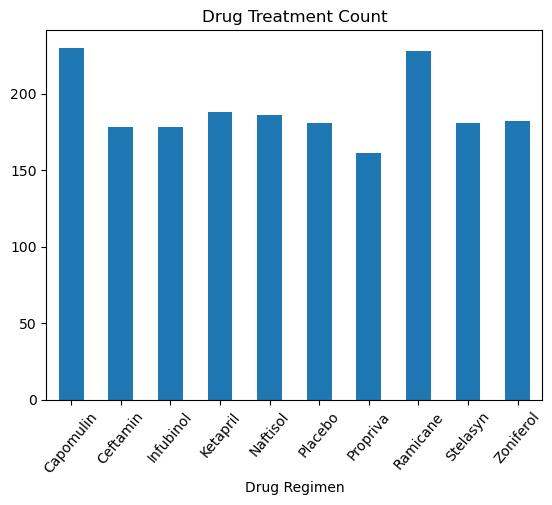

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regimen = pd.DataFrame(inner_merged_total.groupby(["Drug Regimen"]).count()).reset_index()
Drugs_df = Drug_Regimen[["Drug Regimen", "Mouse ID"]]
Drugs_df = Drugs_df.set_index("Drug Regimen")

Drugs_df.plot(kind="bar", legend=False,rot=50)
plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()
plt.savefig('barplot1')

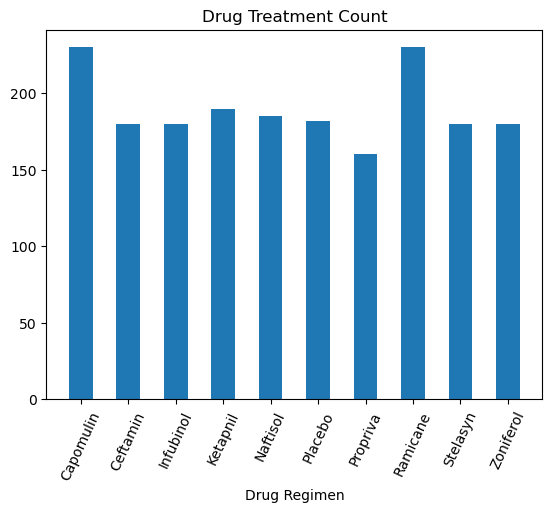

<Figure size 600x400 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
DrugsRegimem = ['Capomulin','Ceftamin','Infubinol','Ketapnil','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
rows = [230,180,180,190,185,182,160,230,180,180] 

#plot bar chart
plt.bar(DrugsRegimem,rows,width=0.5)
plt.title('Drug Treatment Count')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 65) 
plt.figure(figsize=(6, 4))
plt.show() 

KeyError: 'key of type tuple not found and not a MultiIndex'

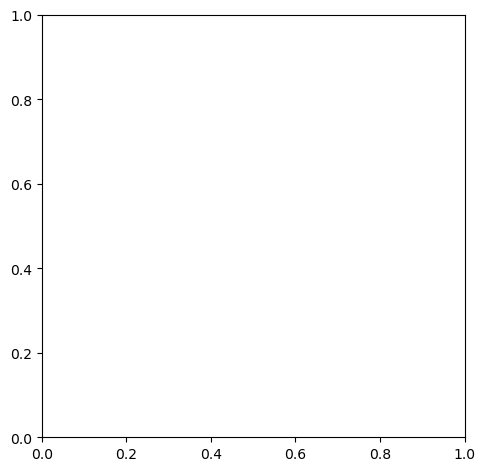

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(12,6))
axl = plt.subplot(121,aspect="equal")
sex_df.plot(kind="pie", y = "Mouse ID", ax=axl, autopct='%1.1f%' ,
               startangle=190, shadow=True, labels=sex_df["Male","Female"], legend = False, fontsize=14)
plt.title("Male & Female Distribution")
plt.xlabel("")
plt.ylable("")

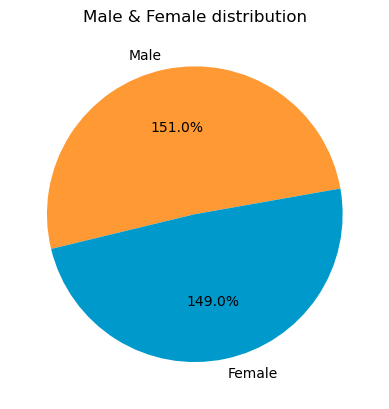

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size = [510, 490 ]
lable = 'Male', 'Female'
colors = ['#FF9933','#0099cc']

plt.pie(size, labels = lable, autopct = '1%.1f%%', startangle = 10,colors=colors)
plt.title('Male & Female distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


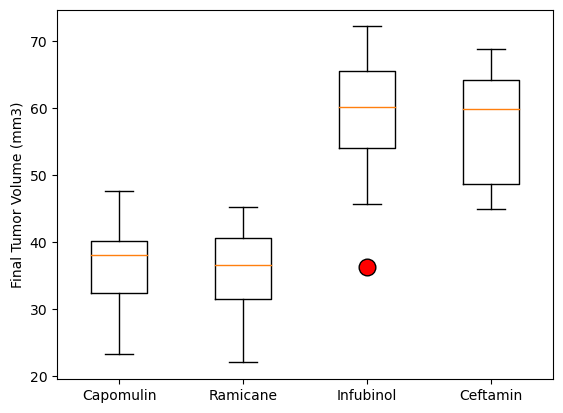

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

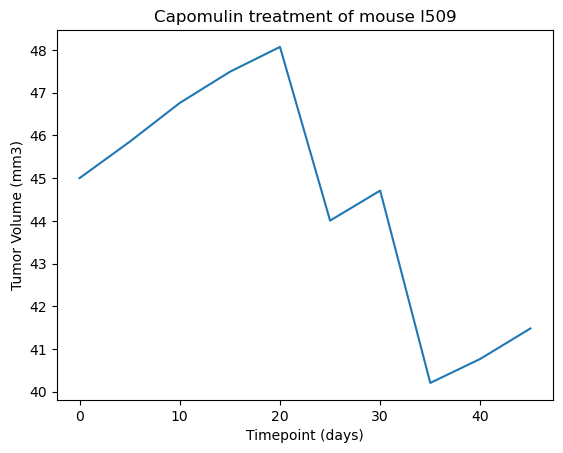

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


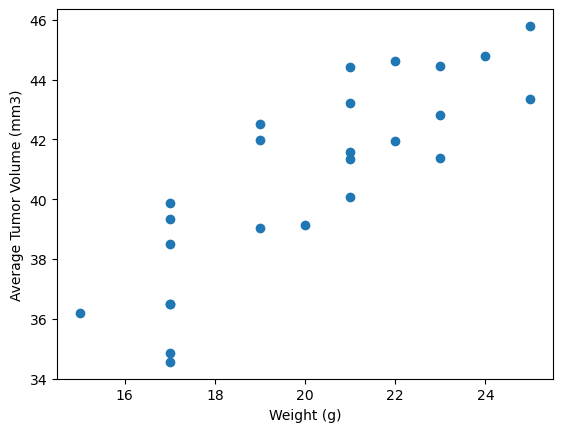

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


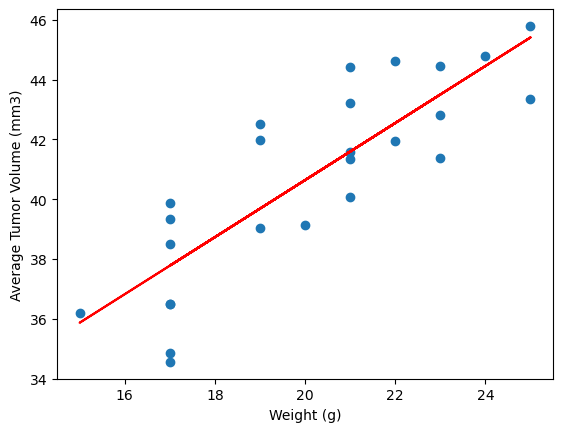

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
